# Determining best market to advertise programming courses

Let assume that I'm working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository: https://github.com/freeCodeCamp/2017-new-coder-survey

In [5]:
freq_job = survey['JobRoleInterest'].value_counts(normalize=True) * 100

In [6]:
print(freq_job)

Full-Stack Web Developer                                                                                                                                                      11.770595
  Front-End Web Developer                                                                                                                                                      6.435927
  Data Scientist                                                                                                                                                               2.173913
Back-End Web Developer                                                                                                                                                         2.030892
  Mobile Developer                                                                                                                                                             1.673341
Game Developer                                                                  

- Most people (~68%) interested in more than one subject.
- This sample is representative for our target population.

In [7]:
popular_subject = freq_job[0:7].index
no_subject = ['Not sure', 'Not sure yet', 'Unsure', 'undecided', "Don't know yet", 'idk']
def regroup(string):
    if string in no_subject:
        string = 'No subject'
    elif ',' in string:
        string = 'Multiple subjects'
    elif string not in popular_subject:
        string = 'Other'
    return string
jobs = survey['JobRoleInterest'].dropna().copy()
jobs = jobs.apply(regroup)

In [8]:
new_freq_job = jobs.value_counts(normalize = True).sort_values() * 100

In [9]:
new_freq_job.head()

No subject                0.143021
Information Security      1.315789
Game Developer            1.630435
  Mobile Developer        1.673341
Back-End Web Developer    2.030892
Name: JobRoleInterest, dtype: float64

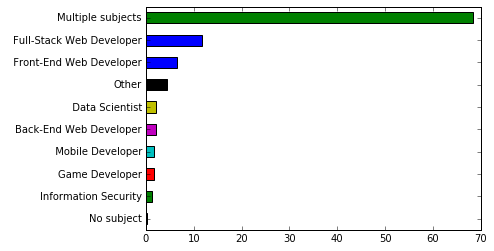

In [10]:
%matplotlib inline
new_freq_job.plot.barh()

In [11]:
target_subject = ['Web Developer', 'Mobile Developer']
count = 0
for ans in jobs:
    if target_subject[0] in ans or target_subject[1] in ans:
        count += 1
print(count)

1532


Web Developer and Mobile Developer are the top single subjects received interest. There was 1532 people showed interest in at least one of these two subjects.

In [12]:
survey = survey[survey['JobRoleInterest'].notnull()]

In [13]:
survey['JobRoleInterest'].head()

1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
6                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object

In [14]:
abs_freq_country = survey['CountryLive'].value_counts().sort_values(ascending=False)

In [15]:
abs_freq_country.head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [16]:
rel_freq_country = survey['CountryLive'].value_counts(normalize=True).sort_values(ascending=False) * 100

In [17]:
rel_freq_country.head(10)

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

The frequency table for the 'CountryLive' variable show USA and India as the two countries with highest number of potential customers. UK, Canada also show good potential. We need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [18]:
survey['MonthsProgramming'].replace(0, 1, inplace = True)

In [19]:
survey['Money_per_month'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

In [20]:
sum(survey['Money_per_month'].notnull())

6317

In [21]:
survey = survey[survey['Money_per_month'].notnull()]

In [22]:
survey = survey[survey['CountryLive'].notnull()]

In [23]:
top_four_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
countries = survey[survey['CountryLive'].apply(lambda c: c in top_four_countries)]

In [24]:
countries.groupby('CountryLive').mean()['Money_per_month'].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: Money_per_month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

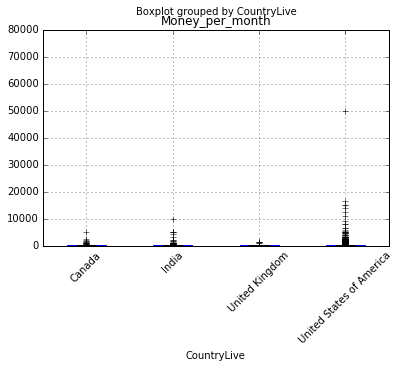

In [25]:
%matplotlib inline
countries.boxplot(column = 'Money_per_month', by = 'CountryLive', rot = 45)

All four countries have outliers as high as 8000 USD. We should remove these outliers and redo the analysis. After examining the data, I found that a cutoff of 200 USD is reasonable.

In [26]:
countries[(countries['Money_per_month'] > 2000) & (countries['AttendedBootcamp'] == 1)].shape[0]

42

In [27]:
countries[countries['Money_per_month'] > 2000].shape[0]

69

61% of the people who spent more than 2000 USD/month attended programming bootcamp, which justify the large amount of money spent.

In [28]:
countries = countries[countries['Money_per_month'] < 2000]

(-20, 2000.0)

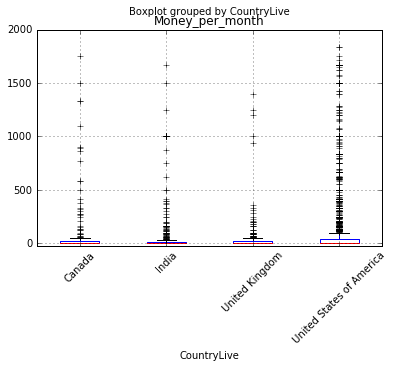

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
countries.boxplot(column = 'Money_per_month', by = 'CountryLive', rot = 45)
plt.ylim(bottom = -20)

In [30]:
countries.groupby('CountryLive').mean()['Money_per_month'].sort_values(ascending=False)

CountryLive
United States of America    82.847724
Canada                      75.550481
India                       57.256604
United Kingdom              45.534443
Name: Money_per_month, dtype: float64

After removing the outliers, USA and Canada appears to be the two best countries to choose for advertisement. India come in third place, followed by UK.

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

We need to choose one more market though. Although customer in Canada willing to spend more (75 USD/ month), the number of customer in this country is much lower compare to India. If we persuade 10 percent of Indian customers (~53 people) to buy our course, we will get a revenue of 3035 USD/month, while persuading 10 percent of Canadian customers (26 people) only give us a revenue of 1965 USD/ month (35% lower). The same situation is true for UK. Thus our second market should be India.

We can advertise in more than two countries, but the budget should be split based on the potential revenue of each countries.

- Does it make sense to advertise in more than two countries?

-
If we had a marketing team in our company, would it be better to just send them our results and let them use their domain knowledge to take the best decision?